<a href="https://colab.research.google.com/github/Matt-ctrl/ai-workshop-utm-july11/blob/main/Student_Pytorch_Fundamentals_UTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to PyTorch
According to [NVIDIA website]()

>PyTorch is a fully featured framework for **building deep learning models**, which is a type of machine learning that’s commonly used in applications like image recognition and language processing. Written in Python, it’s relatively <ins>easy for most machine learning developers to learn and use</ins>. PyTorch is distinctive for its excellent support for GPUs and its use of ***reverse-mode auto-differentiation**, which enables computation graphs to be **modified on the fly**. This makes it a popular choice for <ins>fast experimentation and prototyping</ins>

##Before we start with pytorch

Let's look at what it takes to develop AI/ML system.

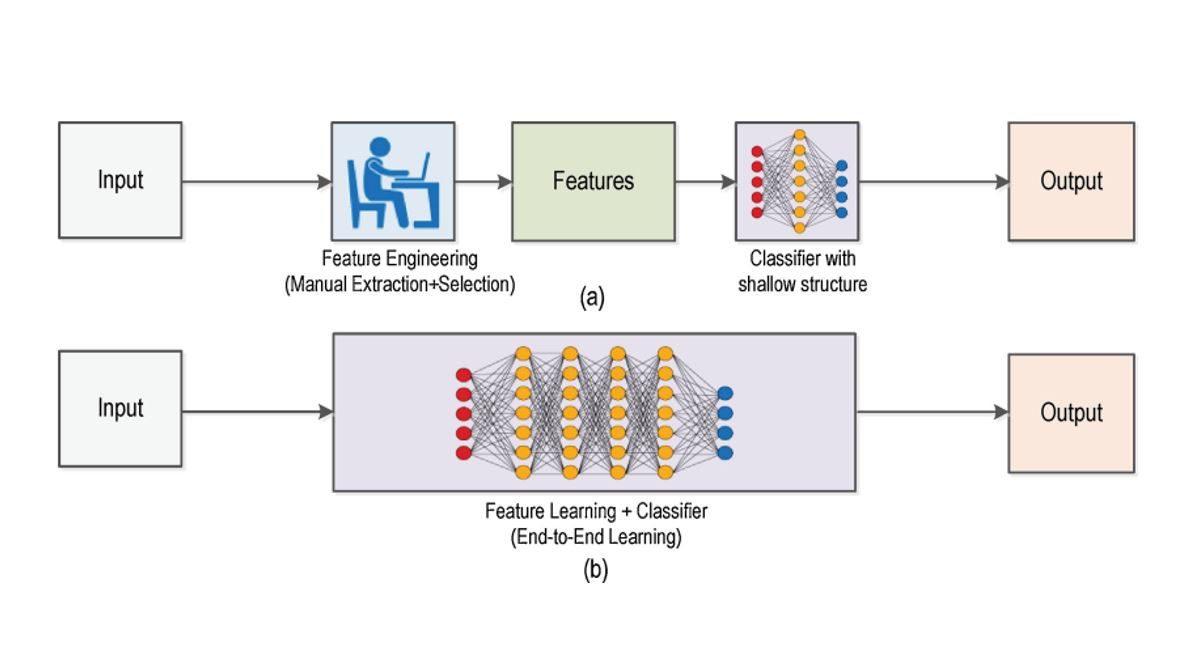


Generally we can say that it contains these three components

* Input - what we give the model (image, text, or numerical data).. This is where PyTorch Tensors come into play — they are used to represent the input data in a format the model can process.

* Output - what the model predicts. This can be:
 * classification: e.g. cat/dog, pain/no-pain,
 * Regression: pain intensity score, House Price Prediction, Stock price

* Model - that finds the relationship between inputs and outputs

* Training - the process of learning from data where the model adjusts itself using:
 * supervised: learns from labeled data
 * semi-supervised: used both label and unlabeled data
 * unsupervised: learns from patterns in unlabeled data



##Input

Now that we know what a machine learning model does — it takes inputs, learns from them, and gives outputs — let’s ask a very important question:

> How do we actually give data to a model?

A model doesn't <ins>understand images</ins>, text, or sound the way we do.
It only understands numbers.
So before we can train or test any model, we need to convert our data into numbers.

This is where Tensors come in.
Think of a tensor as a fancy container for numbers.
It can hold:

* A single number (like 3.14)

* A list of numbers (like [1, 2, 3])

* A table of numbers (like a spreadsheet)

* Even a stack of images (3D or 4D!)

And once our data is in this format, we can feed it into a PyTorch model.

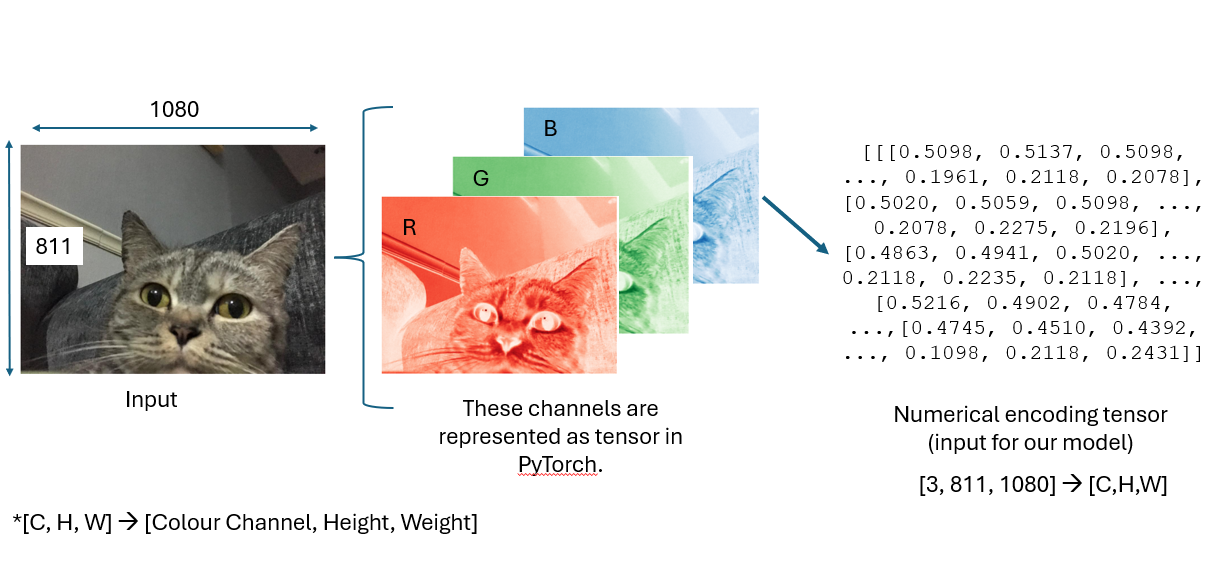

Saving WhatsApp Image 2025-07-06 at 4.16.03 PM.jpeg to WhatsApp Image 2025-07-06 at 4.16.03 PM.jpeg


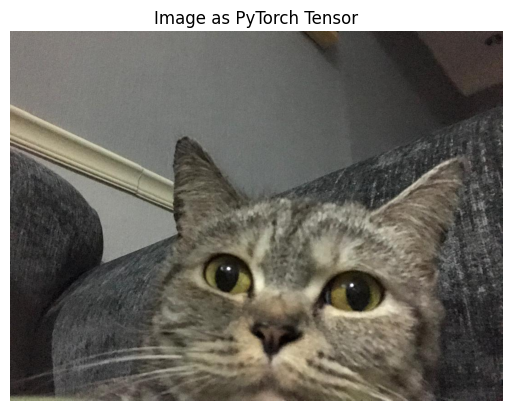

Tensor shape: torch.Size([3, 811, 1080])
Tensor type: <class 'torch.Tensor'>
Numerical encoding: tensor([[[0.5098, 0.5137, 0.5098,  ..., 0.1961, 0.2118, 0.2078],
         [0.5020, 0.5059, 0.5098,  ..., 0.2078, 0.2275, 0.2196],
         [0.4863, 0.4941, 0.5020,  ..., 0.2118, 0.2235, 0.2118],
         ...,
         [0.5216, 0.4902, 0.4784,  ..., 0.1647, 0.2314, 0.2118],
         [0.5647, 0.5373, 0.5176,  ..., 0.1765, 0.2627, 0.2667],
         [0.5882, 0.5647, 0.5490,  ..., 0.1529, 0.2549, 0.2863]],

        [[0.4902, 0.4941, 0.4902,  ..., 0.1608, 0.1765, 0.1725],
         [0.4824, 0.4863, 0.4902,  ..., 0.1725, 0.1922, 0.1843],
         [0.4667, 0.4745, 0.4824,  ..., 0.1765, 0.1882, 0.1765],
         ...,
         [0.5373, 0.5059, 0.4941,  ..., 0.0980, 0.1569, 0.1373],
         [0.5804, 0.5529, 0.5333,  ..., 0.1098, 0.1882, 0.1922],
         [0.6039, 0.5804, 0.5608,  ..., 0.0863, 0.1882, 0.2196]],

        [[0.4745, 0.4784, 0.4745,  ..., 0.1412, 0.1569, 0.1529],
         [0.4667, 0.4706, 

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()


from PIL import Image
import io


image_name = list(uploaded.keys())[0]
image = Image.open(io.BytesIO(uploaded[image_name])).convert('RGB')
image.show()


import torchvision.transforms as transforms
import torch

transform = transforms.ToTensor()
tensor_image = transform(image)

image_for_display = tensor_image.permute(1,2,0)

plt.imshow(image_for_display)
plt.title("Image as PyTorch Tensor")
plt.axis("off")
plt.show()

print("Tensor shape:", tensor_image.shape)
print("Tensor type:", type(tensor_image))
print("Numerical encoding:", tensor_image)


Tensor R channel: tensor([[0.5098, 0.5137, 0.5098,  ..., 0.1961, 0.2118, 0.2078],
        [0.5020, 0.5059, 0.5098,  ..., 0.2078, 0.2275, 0.2196],
        [0.4863, 0.4941, 0.5020,  ..., 0.2118, 0.2235, 0.2118],
        ...,
        [0.5216, 0.4902, 0.4784,  ..., 0.1647, 0.2314, 0.2118],
        [0.5647, 0.5373, 0.5176,  ..., 0.1765, 0.2627, 0.2667],
        [0.5882, 0.5647, 0.5490,  ..., 0.1529, 0.2549, 0.2863]])
Tensor G channel: tensor([[0.4902, 0.4941, 0.4902,  ..., 0.1608, 0.1765, 0.1725],
        [0.4824, 0.4863, 0.4902,  ..., 0.1725, 0.1922, 0.1843],
        [0.4667, 0.4745, 0.4824,  ..., 0.1765, 0.1882, 0.1765],
        ...,
        [0.5373, 0.5059, 0.4941,  ..., 0.0980, 0.1569, 0.1373],
        [0.5804, 0.5529, 0.5333,  ..., 0.1098, 0.1882, 0.1922],
        [0.6039, 0.5804, 0.5608,  ..., 0.0863, 0.1882, 0.2196]])
Tensor B channel: tensor([[0.4745, 0.4784, 0.4745,  ..., 0.1412, 0.1569, 0.1529],
        [0.4667, 0.4706, 0.4745,  ..., 0.1529, 0.1725, 0.1647],
        [0.4510, 0.458

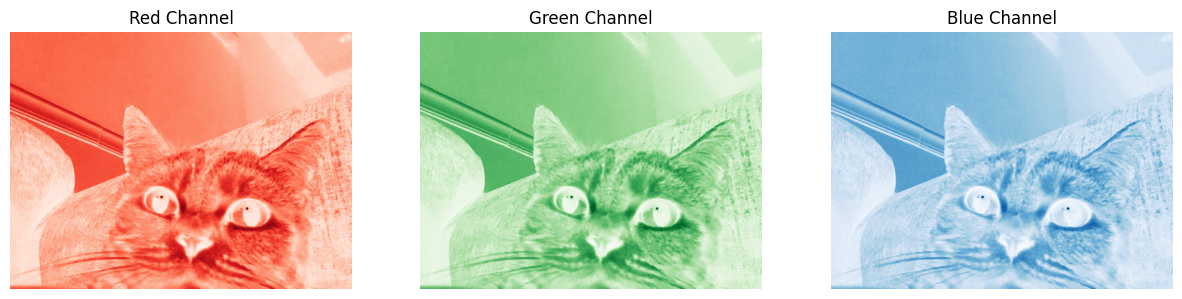

In [ ]:
import matplotlib.pyplot as plt

# Split channels
R = tensor_image[0]  # Red channel
G = tensor_image[1]  # Green channel
B = tensor_image[2]  # Blue channel

# Plot all channels
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title("Red Channel")
axs[0].axis("off")
print("Tensor R channel:", R)


axs[1].imshow(G, cmap='Greens')
axs[1].set_title("Green Channel")
axs[1].axis("off")
print("Tensor G channel:", G)

axs[2].imshow(B, cmap='Blues')
axs[2].set_title("Blue Channel")
axs[2].axis("off")
print("Tensor B channel:", B)

#Tensors

As we know, tensors are required to feed data into our deep learning or machine learning models so they can learn patterns.
A tensor can be described as an *array* (like a list or table of numbers), or a *stack of arrays* arranged in multiple dimensions.

>In PyTorch, tensors are like NumPy arrays but smarter they can track gradients, run on GPU, and are the standard way to represent inputs and outputs in a model.
But in order to do that let's look at few libraries to create, and manipulate tensors.

There are 5 common tensors types:

| Type          | Shape            | Meaning                 | Example Use              |
| ------------- | ---------------- | ----------------------- | ------------------------ |
| **Scalar**    | `torch.Size([])` | A single number         | Loss value               |
| **Vector**    | `[N]`            | 1D tensor (list)        | Feature vector           |
| **Matrix**    | `[N, M]`         | 2D tensor (table)       | Grayscale image, weights |
| **3D Tensor** | `[C, H, W]`      | Channels, Height, Width | RGB image                |
| **4D Tensor** | `[B, C, H, W]`   | Batch of 3D images      | Input for CNN            |


Let's create these tensors using ``torch.Tensor()``[Docs](https://docs.pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor)

[Info on how to create tensor](https://docs.pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

In [ ]:
import torch

#Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
#Get tensor back as python int
scalar.item()

7

In [ ]:
#Vector
vector = torch.tensor([1,2,3,4,6,32902])
vector

tensor([    1,     2,     3,     4,     6, 32902])

In [ ]:
vector.ndim


1

In [ ]:
#Matrix
matrix = torch.tensor([[1,2,3],[4,5,6]])
matrix

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
matrix.ndim

2

In [ ]:
#Shape of matrix

matrix.shape

torch.Size([2, 3])

In [ ]:
#Tensors
TENSOR = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

To access each element/arrays
```
dim=0 → [
           dim=1 → [
                      dim=2 →
                      [1, 2, 3],   # row 0
                      [4, 5, 6],   # row 1 ← tensor[0][1]
                      [7, 8, 9]    # row 2
                   ]
        ]

```

In [ ]:
TENSOR[0] #Tensor[index at dim=0 ]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
TENSOR[0][0] #Tensor[0th index at dim=0 ][0th index at dim=1]

tensor([1, 2, 3])

In [ ]:
TENSOR[0][0][1]#Tensor[0th index at dim=0 ][0th index at dim=1][1st index at dim=1]

tensor(2)

###Challenge

In [ ]:
#challenge

TENSOR_C = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]],[[11,22,33],[44,55,6],[77,88,99]]])
TENSOR_C

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[11, 22, 33],
         [44, 55,  6],
         [77, 88, 99]]])

####Answer

In [ ]:
#can you get [11, 22, 33] array?
#can you get [[11, 22, 33],[44, 55,  6],[77, 88, 99]] array?
#can you get element 44 ?

#Answer here

tensor([[11, 22, 33],
        [44, 55,  6],
        [77, 88, 99]])

##Create random Tensor

To create a random tensor we'll going to use ```torch.rand()```. Why is this important? Because when we build a model from scratch, most of the weights (and biases) are randomly initialized.
These weights are what the model uses to make predictions and during training, they are tuned and updated through the training loop.
**Unless** we're using a pre-trained model or using ``seed``, our model always starts from random weights, and learns from there.

This is the loop: <br>
```We start with random numbers → look at predictions → update the numbers → repeat — and that’s how learning happens.```
<br> OR <br>
```random weights → predictions → loss → update weights → repeat ```


[Docs](https://docs.pytorch.org/docs/stable/generated/torch.rand.html#torch.rand)

In [ ]:
random_tensor = torch.rand(3,24,24) #we're creating random tensor with a shape of [3, 24, 24]
random_tensor

tensor([[[0.3235, 0.1674, 0.6016,  ..., 0.3145, 0.5767, 0.4045],
         [0.0922, 0.9772, 0.0971,  ..., 0.6392, 0.0178, 0.6451],
         [0.6101, 0.6350, 0.7011,  ..., 0.5483, 0.2989, 0.9618],
         ...,
         [0.0578, 0.6833, 0.5662,  ..., 0.0335, 0.7875, 0.7340],
         [0.8392, 0.2305, 0.6985,  ..., 0.7521, 0.8688, 0.5296],
         [0.4326, 0.9173, 0.7470,  ..., 0.2457, 0.8098, 0.5335]],

        [[0.9435, 0.1605, 0.9830,  ..., 0.9687, 0.9290, 0.9219],
         [0.0143, 0.6725, 0.0395,  ..., 0.8180, 0.9241, 0.1372],
         [0.3706, 0.0175, 0.9630,  ..., 0.3994, 0.5474, 0.2190],
         ...,
         [0.6569, 0.4344, 0.5585,  ..., 0.1139, 0.1912, 0.9063],
         [0.9833, 0.6981, 0.1768,  ..., 0.0988, 0.2580, 0.7779],
         [0.8294, 0.3522, 0.0618,  ..., 0.2311, 0.5460, 0.6317]],

        [[0.4561, 0.9427, 0.8241,  ..., 0.7429, 0.1697, 0.6074],
         [0.3908, 0.7474, 0.8617,  ..., 0.7725, 0.5715, 0.7770],
         [0.6758, 0.1214, 0.6288,  ..., 0.1297, 0.2103, 0.

In [ ]:
random_tensor_second = torch.rand(3,4)
random_tensor_second


tensor([[0.9320, 0.1259, 0.6294, 0.7001],
        [0.2019, 0.0714, 0.4830, 0.7714],
        [0.6854, 0.7889, 0.3239, 0.3400]])

In [ ]:
random_tensor_second.shape #attribute/property

torch.Size([3, 4])

In [ ]:
random_tensor_second.size() #.size is getter method

torch.Size([3, 4])

In [ ]:
#create Zeros and Ones

#there's two ways to create zeros tensor one we using operation - multiplication wise
random_tensor_example = torch.rand(3,4,4)

zeros = random_tensor_example*0

zeros

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
#Or create using torch method

torch.zeros(3,4,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
torch.ones(3,4,4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

##Create range tensor

We use ``torch.arange()`` when we want to create a 1D tensor containing values in a specific range.

```torch.arange(start, end, step)
```[Docs](https://docs.pytorch.org/docs/stable/generated/torch.arange.html#torch.arange)

In [ ]:
#Range
range_tensor = torch.arange(0,5)
range_tensor

tensor([0, 1, 2, 3, 4])

In [ ]:
#additional argument

#ie
ie_range_tensor = torch.arange(start=1,end=11,step=0.5)
# ie_range_tensor = torch.arange(1,11,0.5) you can also just pass like this without keyword argument like start, end, and step
ie_range_tensor


tensor([ 1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,  4.0000,  4.5000,
         5.0000,  5.5000,  6.0000,  6.5000,  7.0000,  7.5000,  8.0000,  8.5000,
         9.0000,  9.5000, 10.0000, 10.5000])

##Tensor Datatypes.

Every tensor has a data type (dtype), which determines what kind of values it stores — like integers, floats, or booleans. [Docs](https://docs.pytorch.org/docs/stable/tensors.html)


| Data Type       | Meaning                                | Example Use                       |
| --------------- | -------------------------------------- | --------------------------------- |
| `torch.float32` | 32-bit floating point (default)        | Model weights, most ML operations |
| `torch.float64` | 64-bit floating point (high precision) | Scientific computing              |
| `torch.int32`   | 32-bit integer                         | Labels, index values              |
| `torch.int64`   | 64-bit integer (also called `long`)    | Most common for class labels      |
| `torch.bool`    | Boolean (True/False)                   | Masking, condition filters        |


In [ ]:
import torch


x = torch.tensor([1.0, 2.0])
print("Default dtype:", x.dtype)


i = torch.tensor([1, 2, 3], dtype=torch.int64)
print("tensor dtype:", i.dtype)


b = torch.tensor([True, False, True], dtype=torch.bool) # you dont actually need to specified the default everytime you create it'll automatically done it for you
print("tensor dtype:", b.dtype)


Default dtype: torch.float32
tensor dtype: torch.int64
tensor dtype: torch.bool


In [ ]:
#if you read the docs for torch.tensor https://docs.pytorch.org/docs/stable/generated/torch.tensor.html#torch.tensor
#you'll find that torch.tensor has dtype to None, device to None, requires_grad to False by default

tensor_float_32 = torch.tensor([1.0,2.0,3.0],
                               dtype=None, #Although it is set to none the dtype, by default pytorch set it to float32
                               device=None, #what type of device you tensor on (as right now im not running on any cuda or nvidia gpu if you want to run please set it beforehand)
                               requires_grad=False)
tensor_float_32.dtype #this is the default for tensor set by pytorch please remember!!

torch.float32

we can convert it to another datatype

In [ ]:
tensor_float_32_to_int64 = tensor_float_32.type(torch.int64)

tensor_float_32_to_int64.dtype

torch.int64

###How to get Tensor attributes
1. Tensor datatypes -> `Tensor.dtype`
2. Tensor shape -> `Tensor.shape` or `Tensor.size()`  

  > it should be noted that shape is **attribute** while size is **static function or method** so we should *invoke* it

3. Tensor device -> `Tensor.device`

In [ ]:
tensor_example = torch.rand(1,3,3)
tensor_example

tensor([[[0.0445, 0.3698, 0.0622],
         [0.2485, 0.0599, 0.0609],
         [0.0499, 0.9750, 0.4434]]])

In [ ]:
tensor_example.dtype
tensor_example.shape # OR  tensor_example.size()
tensor_example.device

print(f"Datatype of tensor: {tensor_example.dtype}")
print(f"Shape of tensor: {tensor_example.shape}")
print(f"Device tensor is on: {tensor_example.device}")


Datatype of tensor: torch.float32
Shape of tensor: torch.Size([1, 3, 3])
Device tensor is on: cpu


##Tensor manipulation
* addition
* subtraction
* multiplication (element-wise)
* matrix multiplication

In [ ]:
#Addition (element-wise)
tensor_addition_matrix = torch.tensor([[1,2,3,4]]) #this is matrix remember
tensor_addition_vector = torch.tensor([1,5,6])
print(f"addition with matrix tensor:{tensor_addition_matrix+10}")
print(f"addition with vector tensor:{tensor_addition_vector+10}")


addition with matrix tensor:tensor([[11, 12, 13, 14]])
addition with vector tensor:tensor([11, 15, 16])


In [ ]:
#subtraction (element-wise)
tensor_sub_matrix = torch.tensor([[1,2,3,4]]) #this is matrix remember
tensor_sub_vector = torch.tensor([1,5,6])
print(f"subtraction with matrix tensor:{tensor_sub_matrix-10}")
print(f"subtraction with vector tensor:{tensor_sub_vector-10}")

subtraction with matrix tensor:tensor([[-9, -8, -7, -6]])
subtraction with vector tensor:tensor([-9, -5, -4])


In [ ]:
# multiplication (element-wise)
tensor_mul_matrix = torch.tensor([[1,2,3,4]]) #this is matrix remember
tensor_mul_vector = torch.tensor([1,5,6])
print(f"multiplication with matrix tensor:{tensor_mul_matrix*10}")
print(f"multiplication with vector tensor:{tensor_mul_vector*10}")

multiplication with matrix tensor:tensor([[10, 20, 30, 40]])
multiplication with vector tensor:tensor([10, 50, 60])


So far you've seen we call/invoke the method on top of that `Tensor` instance.

ie `tensor_example.size()`. This is call bound method because we get the method on top of that instance.

However almost all of the torch method are accessible using bound method and static method

for example:

In [ ]:
#this is using static method
#Addition, substraction, multiplication
torch.add(tensor_addition_matrix,10), torch.subtract(tensor_sub_matrix,10), torch.multiply(tensor_mul_matrix,10) #ignore the tuple print below I just want to show built in function


(tensor([[11, 12, 13, 14]]),
 tensor([[-9, -8, -7, -6]]),
 tensor([[10, 20, 30, 40]]))

In [ ]:
#bound method
tensor_addition_matrix.add(10), tensor_sub_matrix.subtract(10), tensor_mul_matrix.multiply(10)

(tensor([[11, 12, 13, 14]]),
 tensor([[-9, -8, -7, -6]]),
 tensor([[10, 20, 30, 40]]))

##Matrix multiplication
Two main ways of performing matrix multiplication
* Multiplication (element-wise)
* Matrix multiplication (dot product)

In [ ]:
#Element wise multiplication
tensor_element_wise_1 = torch.arange(1,10,1)
tensor_element_wise_2 = torch.arange(1,10,1)

print(f"tensor_element_wise_1: {tensor_element_wise_1}")
print(f"tensor_element_wise_2: {tensor_element_wise_2}")
print(f"tensor_element_wise_1 * tensor_element_wise_2: {tensor_element_wise_1*tensor_element_wise_2}")

tensor_element_wise_1: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor_element_wise_2: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor_element_wise_1 * tensor_element_wise_2: tensor([ 1,  4,  9, 16, 25, 36, 49, 64, 81])


In [ ]:
#Matrix multiplication (dot product)
tensor_dot_1 = torch.tensor([1,2,3])
tensor_dot_2 = torch.tensor([4,5,6])
print(f"tensor_dot_1: {tensor_dot_1}")
print(f"tensor_dot_2: {tensor_dot_2}")
print(f"tensor_dot_1 dot tensor_dot_2: {torch.matmul(tensor_dot_1,tensor_dot_2)}") #static method
print(f"tensor_dot_1 dot tensor_dot_2: {tensor_dot_1 @ tensor_dot_2}") #this is using symbol

tensor_dot_1: tensor([1, 2, 3])
tensor_dot_2: tensor([4, 5, 6])
tensor_dot_1 dot tensor_dot_2: 32
tensor_dot_1 dot tensor_dot_2: 32


In [ ]:
#recall when dot both must have the same shape!!!
tensor_dot_1 = torch.tensor([1,2,3])
tensor_dot_2 = torch.tensor([4,5])

print(f"tensor_dot_1: {tensor_dot_1}")
print(f"tensor_dot_2: {tensor_dot_2}")
print(f"tensor_dot_1 dot tensor_dot_2: {torch.matmul(tensor_dot_1,tensor_dot_2)}")
print(f"tensor_dot_1 dot tensor_dot_2: {tensor_dot_1 @ tensor_dot_2}")

tensor_dot_1: tensor([1, 2, 3])
tensor_dot_2: tensor([4, 5])


RuntimeError: inconsistent tensor size, expected tensor [3] and src [2] to have the same number of elements, but got 3 and 2 elements respectively

##Rules in matrix dot product

* **Inner Dimension** must between two matrix
* The result size or shape will be same as the **Outer Dimension**
Ie_1: (3x2) @ (2x3) -> (3x3)
Ie_2: (3x2) @ (3x2) -> shape **ERROR**, size doesnt **MATCH**


In [ ]:
#ie
tensor_a_dot = torch.rand(3,2)
tensor_b_dot = torch.rand(2,3)
print(f"tensor_a_dot size: {tensor_a_dot.size()} | tensor_b_dot size: {tensor_a_dot.shape} ")
print(f"tensor_a_b_dot: {tensor_a_dot@tensor_b_dot}, size: {(tensor_a_dot@tensor_b_dot).size()}")

tensor_a_dot size: torch.Size([3, 2]) | tensor_b_dot size: torch.Size([3, 2]) 
tensor_a_b_dot: tensor([[0.3767, 0.1102, 0.0526],
        [0.4596, 0.1120, 0.1070],
        [0.3283, 0.0718, 0.0920]]), size: torch.Size([3, 3])


In [ ]:
#Error of size doesnt match
tensor_a_dot_err = torch.rand(3,2)
tensor_b_dot_err = torch.rand(3,2)
print(f"tensor_a_b_dot: {tensor_a_dot_err@tensor_b_dot_err}, size: {(tensor_a_dot_err@tensor_b_dot_err).size()}") #!ERROR!!!

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

To fix this we can transpose either one of the matrices either ```tensor_a_dot_err``` or ```tensor_b_dot_err```

Using static method ```torch.t()``` or bound method ```torch.Tensor.T```

In [ ]:
#let's transpose tensor_b_dot_err the result of size would be (2x3)
tensor_b_dot_err_transpose = tensor_b_dot_err.T #or torch.t(tensor_b_dot_err)
print(f"result of transposing tensor b: {tensor_b_dot_err_transpose}")
print(f"tensor_a_dot size: {tensor_a_dot_err.size()} | tensor_b_dot_err_transpose size: {tensor_b_dot_err_transpose.shape} ")
print(f"multiplication result: {tensor_a_dot_err @ tensor_b_dot_err_transpose}, size: {(tensor_a_dot_err @ tensor_b_dot_err_transpose).size()}  ")

result of transposing tensor b: tensor([[0.0127, 0.9304, 0.5335],
        [0.0730, 0.6962, 0.2804]])
tensor_a_dot size: torch.Size([3, 2]) | tensor_b_dot_err_transpose size: torch.Size([2, 3]) 
multiplication result: tensor([[0.0415, 0.3966, 0.1599],
        [0.0411, 0.6091, 0.2879],
        [0.0308, 0.3888, 0.1752]]), size: torch.Size([3, 3])  


##Max, Min, Mean and Sum

In [ ]:
#max
tensor_f = torch.arange(1,11,1)
print(tensor_f)
tensor_f.max() #or you could use static method of torch, which is torch.max(tensor_f)


tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


tensor(10)

In [ ]:
#min
tensor_f.min() #or you could use static method of torch, which is torch.min(tensor_f)

tensor(1)

But if we trying to get the mean..


In [ ]:
tensor_f.mean()

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [ ]:
#let's look at the datatype of tensor_f
tensor_f.dtype

torch.int64

In [ ]:
#here how to solve it
#convert it to float32 or more complex dtypes -> tensor_f.type(torch.float32)
tensor_f.type(torch.float32).mean()
# torch.mean(tensor_f.type(torch.float32)) # with torch static method

tensor(5.5000)

In [ ]:
#Sum
# tensor_f.sum() #method attach to object Tensor, this is what we call bound method
torch.sum(tensor_f) #with static method

tensor(55)

#argmax, argmin

* if you want to get the index of element with max/min value you need to use ```torch.argmax()``` and ```torch.argmin()```
* ofc like many other functions we learned, here you can use bound method instead of using PyTorch static method  ```torch.argmax()``` and ```torch.argmin()```

In [ ]:
#argmax
tensor_p = torch.rand(3,3)
print(tensor_p, f"tensor_p.max: {tensor_p.max()}")
print(f"index of max value: {tensor_p.argmax()}")

tensor([[0.2126, 0.1741, 0.7007],
        [0.8409, 0.8483, 0.9260],
        [0.3802, 0.5898, 0.8073]]) tensor_p.max: 0.9260111451148987
index of max value: 5


In [ ]:
#argmin
tensor_p = torch.rand(3,3)
print(tensor_p, f"tensor_p.min: {tensor_p.min()}")
print(f"index of min value: {tensor_p.argmin()}")

tensor([[0.7889, 0.7487, 0.3635],
        [0.8738, 0.1750, 0.4563],
        [0.1891, 0.8549, 0.0505]]) tensor_p.min: 0.05050569772720337
index of min value: 8


#Reshaping, squeezing, and un squeezing tensors

* Reshaping- reshapes a tensor to defined shape (followed that it's in correct number of element)
* squeeze - removes all of 1 dimension to a target tensor
* unsqueeze - add a 1 dimension to a target tensor
* Permute - return the input with dimensions permuted is swapped in a certain way  

In [ ]:
#Let's create a tensor
tensor_I = torch.rand(2,5) #let's create a matrix
tensor_I

tensor([[0.6604, 0.5329, 0.6854, 0.4142, 0.1023],
        [0.6685, 0.7042, 0.7657, 0.1176, 0.0199]])

In [ ]:
#reshape
tensor_I.reshape(2,5) #works because 2 x 5 = 10 elements, the original have 10 elements so its possible
#or
tensor_I.reshape(5,2)

tensor([[0.6604, 0.5329],
        [0.6854, 0.4142],
        [0.1023, 0.6685],
        [0.7042, 0.7657],
        [0.1176, 0.0199]])

In [ ]:
# ERROR
tensor_I.reshape(3,5) #not possible 3 x 5 = 15 elements but our original only have 10 elements so its not possible

RuntimeError: shape '[3, 5]' is invalid for input of size 10

##torch.squeeze() and torch.unsqueeze()

Docs: [`torch.squeeze()`](https://docs.pytorch.org/docs/stable/generated/torch.squeeze.html#torch.squeeze) & [`torch.unsqueeze()`](https://docs.pytorch.org/docs/stable/generated/torch.unsqueeze.html#torch.unsqueeze)

Theres bound method: [`Tensor.squeeze`](https://docs.pytorch.org/docs/stable/generated/torch.Tensor.squeeze.html) & [`Tensor.unsqueeze`](https://docs.pytorch.org/docs/stable/generated/torch.Tensor.unsqueeze.html#torch-tensor-unsqueeze)

In [ ]:
#squeezing, and unsqueeze
#note im showing squeeze and squeeze with static method but it also have bound method
tensor_sq_ex = torch.rand(1,9) #let's create a tensor vector as it is easy to understand
print("value of tensor:", tensor_sq_ex)
print("shape of tensor:", tensor_sq_ex.shape)


value of tensor: tensor([[0.7261, 0.3241, 0.8892, 0.1318, 0.8375, 0.5625, 0.4138, 0.8621, 0.2793]])
shape of tensor: torch.Size([1, 9])


In [ ]:
#squeeze removes all dimensions that have value of 1, let's say we have (1,2,1,5,6,1) shape, if we squeeze it bcomes (2,5,6)

tensor_after_squeeze = torch.squeeze(tensor_sq_ex) #squeeze it shape [1,9] -> shape [9]: 1 is completely removes from the size dimension

print(f"shape of tensor before squeeze: {tensor_sq_ex.shape}| shape of tensor after squeeze: {tensor_after_squeeze.shape}")
print(f"value of tensor before squeeze: {tensor_sq_ex} | value of tensor after squeeze: {tensor_after_squeeze} ")

shape of tensor before squeeze: torch.Size([1, 9])| shape of tensor after squeeze: torch.Size([9])
value of tensor before squeeze: tensor([[0.7261, 0.3241, 0.8892, 0.1318, 0.8375, 0.5625, 0.4138, 0.8621, 0.2793]]) | value of tensor after squeeze: tensor([0.7261, 0.3241, 0.8892, 0.1318, 0.8375, 0.5625, 0.4138, 0.8621, 0.2793]) 


In [ ]:
#unsqueeze, add dimension
#torch.unsqueeze(input, dim); input is tensor input, dim is dimension we desired to add 1
#[1,2,9]-> [dim=0, dim=1, dim=2] we can say dim is the index or number of shape in order. !Important to take note here.
# if we have [1,2,9] -> [array of arrays in the outer, arrays of element, element ] (This is what I like to think because it's easy to remember)

tensor_unsqueeze = torch.unsqueeze(tensor_after_squeeze, dim=0) #add dimension at dim=0 meaning we add 1 at dim=0 , so from shape [9] -> shape [1,9]
print(f"shape of tensor before unsqueeze: {tensor_after_squeeze.shape}| shape of tensor after unsqueeze: {tensor_unsqueeze.shape}")
print(f"value of tensor before unsqueeze: {tensor_after_squeeze}| value of tensor after unsqueeze: {tensor_unsqueeze}")

shape of tensor before unsqueeze: torch.Size([9])| shape of tensor after unsqueeze: torch.Size([1, 9])
value of tensor before unsqueeze: tensor([0.7261, 0.3241, 0.8892, 0.1318, 0.8375, 0.5625, 0.4138, 0.8621, 0.2793])| value of tensor after unsqueeze: tensor([[0.7261, 0.3241, 0.8892, 0.1318, 0.8375, 0.5625, 0.4138, 0.8621, 0.2793]])


###torch.permute
* usage `torch.permute(input, dims) → Tensor`
* Returns a <ins>view</ins> of the original tensor input with its dimensions permuted.<br>
  
<ins>*view*</ins> : indicate it will share the same memory (or link to the same data). meaning alter view will alter the original tensors


In [ ]:
tensor_permute_ex = torch.rand(2,3,4) #let's create variables to illustrate this examples
tensor_permute_ex.shape, tensor_permute_ex

(torch.Size([2, 3, 4]),
 tensor([[[0.9866, 0.9975, 0.4415, 0.1372],
          [0.0623, 0.0193, 0.0651, 0.0060],
          [0.0461, 0.2165, 0.1819, 0.0123]],
 
         [[0.8981, 0.5364, 0.5298, 0.5316],
          [0.7256, 0.7161, 0.1593, 0.7188],
          [0.1434, 0.4188, 0.9975, 0.1656]]]))

In [ ]:
# Original tensor shape is [2, 3, 4]
# torch.permute() allows us to **reorder the dimensions** of a tensor.
# For example: [2, 3, 4] → [4, 2, 3] or [3, 4, 2] or any other order

# Syntax:
# torch.permute(input, dims)
# - input: the input tensor
# - dims: a tuple of the new order of dimensions (not individual arguments!)
# Example: torch.permute(tensor, (2, 0, 1)) means:
#   - dim=0 becomes dim=2
#   - dim=1 becomes dim=0
#   - dim=2 becomes dim=1

# Using the bound method
tensor_permute = tensor_permute_ex.permute(2, 0, 1)

# Using the static method
tensor_permute_stat = torch.permute(tensor_permute_ex, (2, 0, 1))

print(f"Shape before permute: {tensor_permute_ex.shape} | after (bound): {tensor_permute.shape}")
print(f"Shape before permute: {tensor_permute_ex.shape} | after (static): {tensor_permute_stat.shape}")


Shape before permute: torch.Size([2, 3, 4]) | after (bound): torch.Size([4, 2, 3])
Shape before permute: torch.Size([2, 3, 4]) | after (static): torch.Size([4, 2, 3])


###Challenge

In [ ]:


from google.colab import files
from PIL import Image
import io

uploaded = files.upload()
image_name = list(uploaded.keys())[0]
img = Image.open(io.BytesIO(uploaded[image_name])).convert("RGB")

# Convert to PyTorch tensor
import torchvision.transforms as transforms
transform = transforms.ToTensor()
tensor_img = transform(img)

# TODO: Print the original shape
print("Original shape (C, H, W):", tensor_img.shape)

# TODO: Permute the tensor to (H, W, C)
tensor_img_for_plot = tensor_img.__________

# TODO: Step 5: Display the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(__________)
plt.title("Image after permute")
plt.axis("off")
plt.show()



Saving WhatsApp Image 2025-07-06 at 4.16.03 PM.jpeg to WhatsApp Image 2025-07-06 at 4.16.03 PM (1).jpeg
Original PyTorch tensor shape (C, H, W): torch.Size([3, 811, 1080])


Saving WhatsApp Image 2025-07-06 at 4.16.03 PM.jpeg to WhatsApp Image 2025-07-06 at 4.16.03 PM (2).jpeg
Original shape (C, H, W): torch.Size([3, 811, 1080])


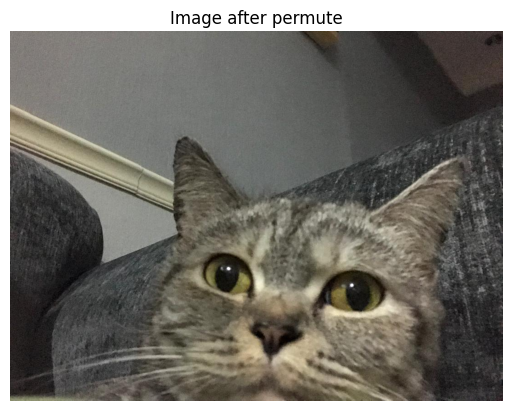

In [ ]:
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()
image_name = list(uploaded.keys())[0]
img = Image.open(io.BytesIO(uploaded[image_name])).convert("RGB")

# Convert to PyTorch tensor
import torchvision.transforms as transforms
transform = transforms.ToTensor()
tensor_img = transform(img)

# TODO: Print the original shape
print("Original shape (C, H, W):", tensor_img.shape)

# TODO: Permute the tensor to (H, W, C)
tensor_img_for_plot = tensor_img.permute(1,2,0)

# TODO: Step 5: Display the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(tensor_img_for_plot)
plt.title("Image after permute")
plt.axis("off")
plt.show()


##Indexing

In [ ]:
index_example_tensor = torch.arange(1,10,1).reshape(1,3,3)
index_example_tensor

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [ ]:
index_example_tensor[0][0]

tensor([1, 2, 3])

In [ ]:
index_example_tensor[0,0,:] #OR JUST index_example_tensor[0,0]

tensor([1, 2, 3])

In [ ]:
#lets say if you want to get 2,5,8 in 2nd dimension only
index_example_tensor[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
# can you get [3,6,9]?
index_example_tensor[:,:,2]

tensor([[3, 6, 9]])

## PyTorch and NumPy

* **NumPy** is a popular numerical computing library in Python, used widely for scientific computing.
* Because of its popularity, **PyTorch provides built-in functionality to interact with NumPy**.

---

### Common Use Cases

You may need to convert between NumPy arrays and PyTorch tensors:

* **NumPy → PyTorch Tensor**:

  ```
  torch.from_numpy(ndarray)
  ```

* **PyTorch Tensor → NumPy**:

  ```
  tensor.numpy()
  ```


<ins>Warning About Default Data Types</ins>

> **Important Note on Data Types During Conversion**

* When you create a **PyTorch tensor**, its default `dtype` is **`float32`**.
  If you convert it to a NumPy array, the NumPy array will **also have `float32`**, unless you **explicitly specify a different type**.

* When you create a **NumPy array**, its default `dtype` is **`float64`**.
  If you convert it to a PyTorch tensor, the tensor will **also have `float64`**, unless you **explicitly set the dtype** in PyTorch.


In [ ]:
import numpy as np
import torch

np_array = np.array([1.0, 2.0, 3.0])        # float64 by default
torch_tensor = torch.from_numpy(np_array)   # will be float64 unless changed

print(torch_tensor.dtype)  # torch.float64


torch.float64


In [ ]:
#PyTorch to NumPy Array
tensor = torch.ones(7) #float32
numpy_tensor = tensor.numpy() #float32 due to default of tensor
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))



##Reproducibility in PyTorch (Taking the "Random" Out of Random)

When we train a neural network, the learning process often starts with **random numbers** — for example:

```
random weights → tensor operations → updated weights → repeat
```

This randomness can lead to slightly different results **every time we run the same code**, which is a problem when we want **consistent results** (like for experiments or debugging).

---

### Controlling Randomness with `torch.manual_seed()`

```python
torch.manual_seed(seed)
```

* `seed` is any integer. Think of it as a **"flavour" of randomness**.
* Using a fixed seed helps ensure **reproducibility**, you get the same random values every time.


---

### Important Behavior

> If you want to generate **more than one identical random tensor** (in size **and** value), you need to reset the seed **before each** call to `torch.rand()`.

```python
torch.manual_seed(42)
a = torch.rand(2, 2)

torch.manual_seed(42)
b = torch.rand(2, 2)

print(torch.equal(a, b))  # True
```

If you don't reset the seed before the second tensor, you'll get **different** values.

---

Why this is important!:

* Useful for **debugging**, **scientific experiments**, and **unit testing**
* Ensures that your results can be **repeated** by others

*You can find more resource regarding [reproducibility](https://pytorch.org/docs/stable/notes/randomness.html)


In [ ]:
#torch.manual_seed()

#let's illustrate how torch.manual_seed() excecute by code block and each invokes only by one code block of torch.rand

#CASE 1 only invokes once (1)
torch.manual_seed(43) #43 is the seed and can be any number
random_1 = torch.rand(3,4)
print("no invokes torch.manual._seed() for random_2")
random_2 = torch.rand(3,4)

print(random_1)
print(random_2)
print(random_1 == random_2) #not equal because torch.manual._seed() is only exceult by one code block of random_1 variables

no invokes torch.manual._seed() for random_2
tensor([[0.4540, 0.1965, 0.9210, 0.3462],
        [0.1481, 0.0858, 0.5909, 0.0659],
        [0.7476, 0.6253, 0.9392, 0.1338]])
tensor([[0.5191, 0.5335, 0.5375, 0.7058],
        [0.4275, 0.2761, 0.8396, 0.1563],
        [0.1072, 0.7261, 0.3241, 0.8892]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
#torch.manual_seed()

#let's illustrate how torch.manual_seed() excecute by code block and each invokes only by one code block of torch.rand

#CASE 2 Invokes twice (2)
torch.manual_seed(43) #43 is the seed and can be any number
random_1 = torch.rand(3,4)
torch.manual_seed(43) #43 is the seed and can be any number
print("no invokes torch.manual._seed() for random_2")
random_2 = torch.rand(3,4)

print(random_1)
print(random_2)
print(random_1 == random_2) #true (equal)

no invokes torch.manual._seed() for random_2
tensor([[0.4540, 0.1965, 0.9210, 0.3462],
        [0.1481, 0.0858, 0.5909, 0.0659],
        [0.7476, 0.6253, 0.9392, 0.1338]])
tensor([[0.4540, 0.1965, 0.9210, 0.3462],
        [0.1481, 0.0858, 0.5909, 0.0659],
        [0.7476, 0.6253, 0.9392, 0.1338]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


#Accessing GPU in pytorch
* we can use torch static method to check if cuda is available for pytorch to use.
  * torch.cuda.is_available() else "cpu"

In [ ]:
#this is how you check do you have access gpu with pytorch
import torch
torch.cuda.is_available() #this ones is false since im using cpu

False

In [ ]:
#so let's use gpu that colab offers (using t4 gpu if you have pro colab version)
import torch
torch.cuda.is_available()

False

In [ ]:
#let's check the detail of t4 (im currently using)
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


#Setup device agnostic code
* what device agnostic code is a code practice, where we want it to run gpu if gpu is available for PyTorch to use.
* to get more info of best practice check [here](https://pytorch.org/docs/stable/notes/cuda.html#best-practices)

In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu" #using a ternary operator
device

'cpu'

In [ ]:
#you could also check gpu count (because you might wanna utilize multiple devices if you have large database)
torch.cuda.device_count() #I have one device which is T4

0

##Putting a tensors (and models) on the GPU
The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [ ]:
tensor_test = torch.tensor([5,6,7])

tensor_test, tensor_test.device #to check the gpu of which this tensor is on

(tensor([5, 6, 7]), device(type='cpu'))

In [ ]:
#Move tensor to gpu (if available)

#agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu" #using a ternary operator
device

#by using a bound method torch.Tensor.to()
tensor_on_gpu = tensor_test.to(device)
tensor_on_gpu


tensor([5, 6, 7])

###Moving tensor back to CPU
  * **IMPORTANT**: NumPy store data (arrays) on CPU.
  * Hence, if we store our tensor on GPU, we need to move (or in this case we copy) it back to CPU

In [ ]:
#Let's illustrate what im explaining.
tensor_on_gpu.numpy() #this resulting an error if you're using GPU

array([5, 6, 7])

## Why you need to know all of these?

These are **some of the most common errors** you’ll run into when working with tensors — especially as a beginner:

---

### 1. **Wrong Data Type**

* When converting between **NumPy and PyTorch**
* When labels are in the wrong format (e.g., `float` instead of `long`)
* Common error:

  ```
  expected scalar type Long but found Float
  ```

Use `.dtype` to check and fix it:

```python
tensor = tensor.to(torch.float32)
```

---

### 2. **Wrong Shape**

* Input has the wrong shape for the model
  (e.g., `[1, 28, 28]` instead of `[1, 1, 28, 28]`)
* Some pre-trained models expect specific shapes
  (e.g., `[batch, 3, 224, 224]`)
* When displaying tensors in `matplotlib`, shape must be `[H, W, C]`

Use `.shape` or `.unsqueeze()`/`.view()` to fix shape mismatches.

---

### **Tensor is on the Wrong Device**

> **This is the issue you're likely seeing if you're using a GPU like Tesla T4**

* You can’t run a model on CUDA if the input is still on CPU
* **Model and input must be on the same device**

Common error:

```
Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!
```

Fix:

```python
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)
input_tensor = input_tensor.to(device)
```

---

### Summary:

Always check these 3 things before running your model:

* Correct **dtype**
* Correct **shape**
* Correct **device**


#Tips on how to convert data to input regardless which domain

One of the most important concepts in AI and deep learning:

> **If you can convert something into numbers, you can train a model to learn from it.**

This means **regardless of the domain** — whether it's:

* Images → convert to pixel arrays (tensors)
* Audio → convert to waveforms or spectrograms
* Text → convert to tokens or embeddings
* Stock data → use numerical time series
* DNA sequences → use k-mer frequencies or embeddings
* Game states, sensor data, keyboard input, etc.

---

### So what's the key?

1. **Represent the input** as a tensor (e.g. shape `[B, C, H, W]` for images)
2. **Represent the output** numerically (e.g. class index, value, or vector)
3. Feed them into a model (`input → model → output`)
4. Let training adjust the model weights to learn the relationship

---

### Real-World Rule

> **The hardest part is not modeling — it’s figuring out how to convert your raw data into good numerical features.**
> Once you do that, everything else becomes a matter of training and tuning.




## PyTorch Domains

Once your data is in **numerical form**, the next question is:

> *How do we process it using PyTorch?*

Fortunately, PyTorch provides **specialized domain libraries** that simplify working with common data types and tasks. These are known as **PyTorch domain libraries**, and each focuses on a specific field.

---

### Key PyTorch Domain Libraries

| Domain                     | Library                                                | Description                                                                     |
| -------------------------- | ------------------------------------------------------ | ------------------------------------------------------------------------------- |
| **Vision**                 | `torchvision`                                          | Tools for working with images — datasets, transforms, models (e.g. ResNet, ViT) |
| **Text / NLP**             | `torchtext`                                            | Handling text, tokenization, vocab, pretrained embeddings                       |
| **Audio**                  | `torchaudio`                                           | Loading audio files, transformations, spectrograms                              |
| **Reinforcement Learning** | `torchrl`                                              | Tools for building and training RL environments                                 |
| **Tabular / Structured**   | Custom or libraries like `skorch` or `pytorch-tabular` | For things like CSV files, financial data, etc.                                 |

You can find more info [here](https://pytorch.org/domains/)


**A domain is the type of data or problem area you're working on in AI

**Also domain can also be refer as a "type of data" (like image, text, or audio), however, it can also be refer to a dataset or task with its own unique distribution or context, even if it's in the same data type.


##Challenge


### Q1 **Predicting Machine Failure in a Factory**

**Goal**: Detect early signs of equipment failure.

* **Output**:

  * Classification: `"normal"`, `"needs maintenance"`, `"failure"`



In [ ]:
#answer here


### **Q2 Smart HVAC System**

**Goal**: Automatically adjust temperature for energy efficiency and comfort.

* **Output**:

  * Target temperature or AC power level (regression)


In [ ]:
#answer here


### **Q3 Autonomous Vehicle Lane Detection**

**Goal**: Keep a car inside its lane using visual input.


* **Output**:

  * Steering angle (regression) or `"left"`, `"right"`, `"straight"` (classification)



In [ ]:
#answer here

In [7]:
import torch
from torch import nn

layers = nn.Sequential(nn.Linear(3,3), nn.Linear(3,2))

layers.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.1948, -0.1110,  0.3371],
                      [ 0.2041,  0.5345,  0.4300],
                      [ 0.0687,  0.0006, -0.2534]])),
             ('0.bias', tensor([ 0.2005, -0.3054,  0.4601])),
             ('1.weight',
              tensor([[ 0.5397, -0.4306,  0.1248],
                      [-0.4513,  0.2532, -0.1685]])),
             ('1.bias', tensor([ 0.5017, -0.0812]))])

In [11]:
torch.randn(9,2).argmax

tensor([[ 0.5470,  0.1820],
        [-1.2074,  1.9489],
        [-1.2039,  0.4138],
        [-0.1948,  1.3413],
        [ 0.6628, -1.6077],
        [ 0.6676,  0.0647],
        [ 2.1513, -0.7736],
        [-0.6478,  2.0153],
        [-0.1804,  0.4778]])

In [12]:
torch.tensor([[ 0.5470,  0.1820],
        [-1.2074,  1.9489],
        [-1.2039,  0.4138],
        [-0.1948,  1.3413],
        [ 0.6628, -1.6077],
        [ 0.6676,  0.0647],
        [ 2.1513, -0.7736],
        [-0.6478,  2.0153],
        [-0.1804,  0.4778]]).argmax()

tensor(12)